In [1]:
import torch
from resnext50 import resnext50
from dataset import TestImageDataset
from torch.utils.data import DataLoader
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,10]


from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
import seaborn as sn

def calcula_pred(red, dataset, batch_size=100):
    # base = []
    predicciones = []
    dataloader = DataLoader(dataset, batch_size)
    for x, lab in tqdm(dataloader):
        out = red.forward(x)
        _, max_idx = torch.max(out, dim=1)
        predicciones.append(max_idx)
    return predicciones

In [2]:
net = resnext50(img_channel=3, num_classes=19)
net.load_state_dict(torch.load(
    r'C:\Users\aleja\Desktop\Tareas\Reconocimiento Virtual con Deep Learning\Tarea1\Trained\best_ResNext.pth'))
net.eval()

ResNext(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU()
  (maxpool): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BottleneckBlock(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1))
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1))
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
      (residual): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1))
        (1): BatchNorm2d(256, ep

In [3]:
test_dataset = TestImageDataset(
    r'C:\Users\aleja\Desktop\Tareas\Reconocimiento Virtual con Deep Learning\Tarea1\Imagenes\clothing-small', 224, 224)

In [4]:
pr = calcula_pred(red=net, dataset=test_dataset, batch_size=32)

predictions = [j for i in pr for j in i]

100%|██████████████████████████████████████████████████████████████████████████████████| 60/60 [07:51<00:00,  7.87s/it]


In [5]:
len(predictions)

1900

In [7]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,10]

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
import pandas as pd
import seaborn as sn

In [6]:
ground_truth = []
for i in range(len(predictions)):
    ground_truth.append(test_dataset[i][1])

In [7]:
confusion_matrix(ground_truth, predictions)

array([[77,  1,  0, 14,  0,  0,  2,  2,  0,  1,  1,  0,  0,  0,  1,  0,
         0,  0,  1],
       [ 1, 53, 11,  3,  1,  4,  0,  1,  2,  0, 10,  1,  5,  0,  1,  7,
         0,  0,  0],
       [ 1,  5, 64,  0,  1,  4,  5,  0,  1,  0,  0,  6,  2,  0,  0,  9,
         2,  0,  0],
       [ 5,  1,  0, 71,  6,  4,  0,  0,  2,  2,  1,  1,  2,  0,  2,  0,
         0,  0,  3],
       [ 1,  2,  0,  3, 63,  4,  4,  1,  1,  0,  0,  3,  2,  0, 13,  3,
         0,  0,  0],
       [ 3,  8,  9,  5,  7, 40, 10,  0,  0,  1,  1,  6,  2,  0,  1,  5,
         0,  1,  1],
       [ 1,  3,  6,  4,  5, 16, 52,  0,  3,  2,  0,  4,  1,  0,  1,  1,
         0,  1,  0],
       [ 5,  0,  1,  1,  1,  1,  0, 73,  9,  1,  0,  0,  1,  0,  2,  0,
         1,  0,  4],
       [ 1,  0,  0,  1,  0,  0,  0,  2, 87,  1,  0,  1,  1,  4,  0,  0,
         1,  0,  1],
       [ 2,  0,  0,  1,  0,  0,  2,  1,  1, 86,  0,  0,  5,  0,  1,  0,
         0,  0,  1],
       [ 0, 16, 21,  0,  7,  3,  1,  0,  3,  0, 36,  2,  5,  0,  1,  4

In [8]:
data=[]
for i in range(len(predictions)):
    data.append([predictions[i].item(), ground_truth[i]])


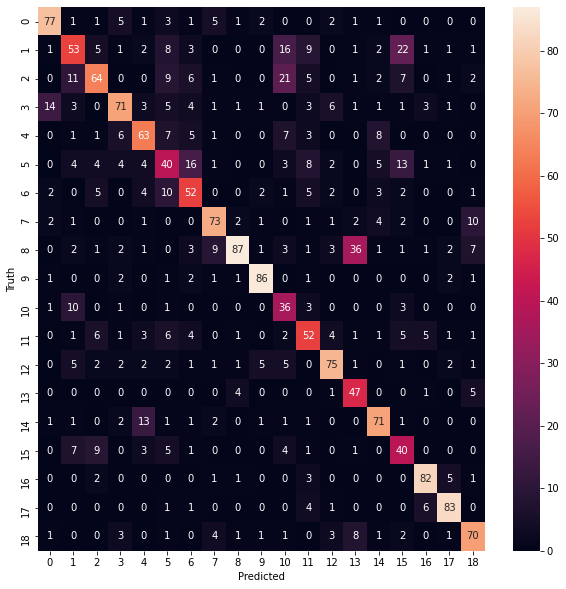

<Figure size 1080x1080 with 0 Axes>

In [9]:
df = pd.DataFrame(data, columns=['y_Truth','y_Predicted'])
conf_mat = pd.crosstab(df['y_Truth'], df['y_Predicted'], rownames=['Truth'], colnames=['Predicted'])

sn.heatmap(conf_mat, annot=True,)

plt.figure(figsize=(15,15))
plt.show()

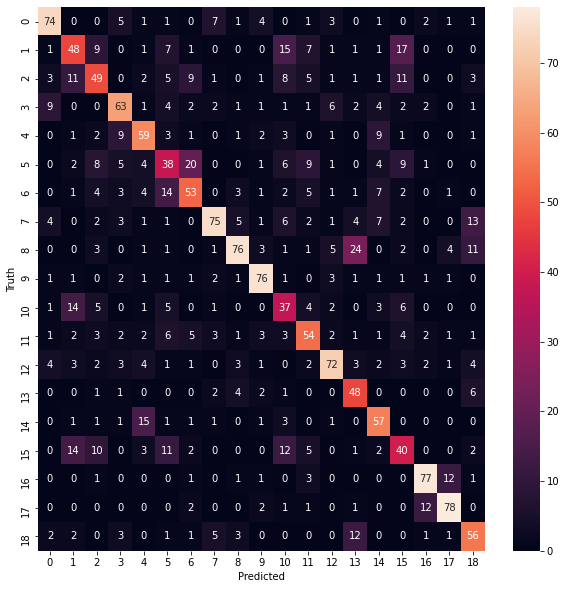

<Figure size 1080x1080 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [47]:
df = pd.DataFrame(data, columns=['y_Truth','y_Predicted'])
conf_mat = pd.crosstab(df['y_Truth'], df['y_Predicted'], rownames=['Truth'], colnames=['Predicted'])

sn.heatmap(conf_mat, annot=True,)

plt.figure(figsize=(15,15))
plt.show()

In [10]:
wrong=[]
cont= 0
for i in range(len(predictions)):
    boolean = predictions[i].item()==ground_truth[i]

    if boolean == False:
        wrong.append(i)
    else:
        cont += 1
    



In [26]:
cont/1900 *100

59.473684210526315

In [11]:
cont/1900 *100

64.31578947368422

In [14]:
wrong[0:5]

[0, 7, 8, 9, 10]

In [12]:
g = np.swapaxes(test_dataset[7][0], 0,2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


hat 16


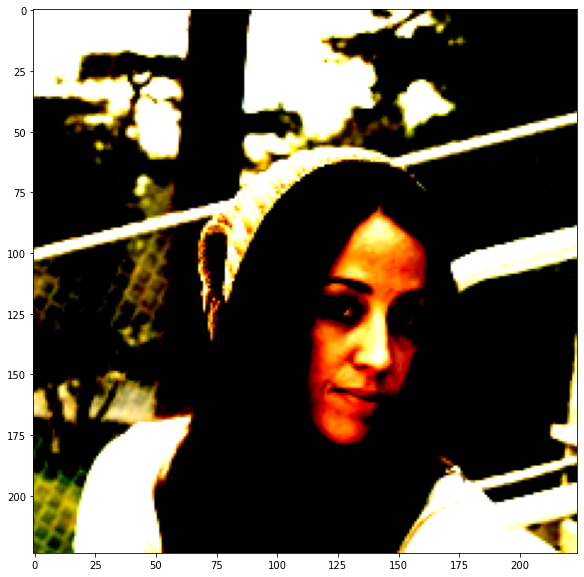

In [13]:
plt.imshow(g)
print(test_dataset.read_mapping()[predictions[7].item()], ground_truth[7])


In [14]:
print(predictions[2].item(),ground_truth[2])

2 15


In [15]:
wrong_class0 = []
cont0 = 0
for i in range(len(predictions)):
    if ground_truth[i] == 0 and predictions[i] == 0:
        cont0 += 1
    elif ground_truth[i] == 0 and predictions[i] != 0:
        wrong_class0.append(i)
        

In [16]:
def contar_veces(elemento, lista):
    veces = 0
    for i in lista:
        if elemento == i:
            veces += 1
    return veces

In [17]:
cont0/contar_veces(0,ground_truth) *100

77.0

In [18]:
wrong_class0[0:5]

[4, 95, 147, 215, 281]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


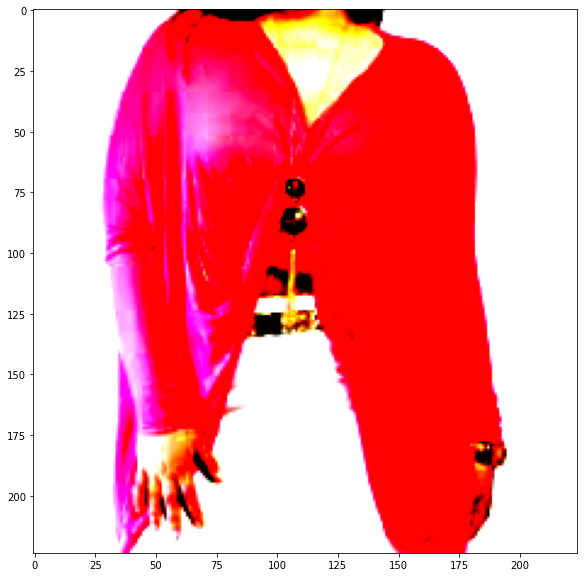

In [19]:
plt.imshow(np.swapaxes(test_dataset[0][0],0,2))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


shorts


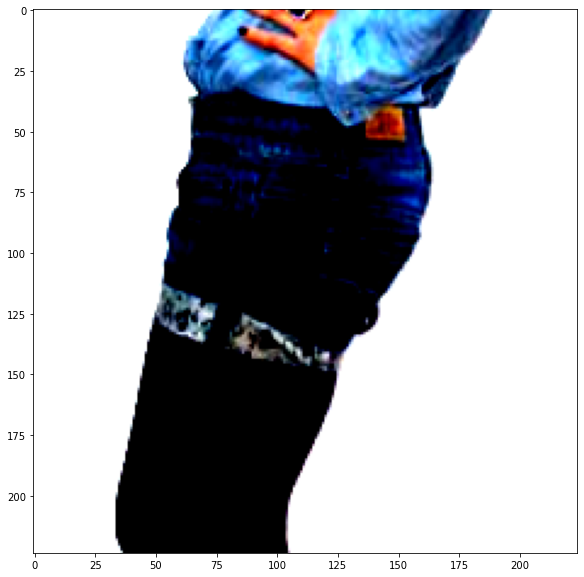

In [20]:
c0 = np.swapaxes(test_dataset[22][0], 0,2)
plt.imshow(c0)
print(test_dataset.read_mapping()[predictions[22].item()])

In [22]:
def classes_wrong(pred,truth):
    errores = []
    accuracies = []
    for i in range(19):
        err = []
        contador = 0
        for j in range(len(predictions)):
            if ground_truth[j] == i and predictions[j] == i:
                contador += 1
            elif ground_truth[j] == i and predictions[j] != i:
                err.append(j)
        accuracies.append(contador / contar_veces(i, ground_truth))
        errores.append(err)
    return errores,accuracies

In [23]:
err, acc = classes_wrong(predictions,ground_truth)

In [24]:
acc

[0.77,
 0.53,
 0.64,
 0.71,
 0.63,
 0.4,
 0.52,
 0.73,
 0.87,
 0.86,
 0.36,
 0.52,
 0.75,
 0.47,
 0.71,
 0.4,
 0.82,
 0.83,
 0.7]

In [25]:
err[0]

[4,
 95,
 147,
 215,
 281,
 282,
 381,
 473,
 480,
 823,
 836,
 982,
 1072,
 1085,
 1150,
 1209,
 1312,
 1317,
 1411,
 1636,
 1662,
 1741,
 1790]

In [33]:
test_dataset.read_mapping()

{0: 'shorts',
 1: 'jackets_parka',
 2: 'sweater',
 3: 'skirts',
 4: 'dress',
 5: 'blouse_shirts',
 6: 'tee',
 7: 'pants',
 8: 'shoes',
 9: 'belt',
 10: 'coat',
 11: 'scarf',
 12: 'bag',
 13: 'socks',
 14: 'jumper',
 15: 'blazer',
 16: 'hat',
 17: 'glasses',
 18: 'tights'}

In [33]:
t1 = torch.tensor([[1,2,3],[4,5,6]])
t2 = torch.tensor([[1,2,3],[4,5,6]])

t3 = torch.cat((t1,t2),dim=0)
t3

tensor([[1, 2, 3],
        [4, 5, 6],
        [1, 2, 3],
        [4, 5, 6]])

In [42]:
tr = [t1,t2]

[tensor([[1, 2, 3],
         [4, 5, 6]]),
 tensor([[1, 2, 3],
         [4, 5, 6]])]

In [55]:
in_data = []
for i in range(64):
    in_data.append(test_dataset[i][0])

In [56]:
prueba=torch.stack(in_data)

In [58]:
y_test=net.forward(prueba)

In [26]:
t_d = []
for i in range(64):
    t_d.append(test_dataset[i][0])
    

In [71]:
torch.argmax(y_test[7])

tensor(18)

In [70]:
predictions[7]

tensor(18)

In [ ]:
len(tre)